# Data Analysis | Data Cleaning | Data Vasualization | Feature Engineering

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-house-price/1553768847-housing.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#warnings handle class
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/kaggle/input/random-house-price/1553768847-housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#columns= ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
#'population', 'households', 'median_income', 'median_house_value']

df.select_dtypes(include=['float64', 'int64']).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [8]:
df.select_dtypes(include=['float64', 'int64']).cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.014139,-3.957054,-2.728244,1.948037e+02,5.876851e+01,2.263778e+02,4.236807e+01,-0.057765,-1.062743e+04
latitude,-3.957054,4.562293,0.300346,-1.682178e+02,-6.029962e+01,-2.631378e+02,-5.801024e+01,-0.323860,-3.553256e+04
housing_median_age,-2.728244,0.300346,158.396260,-9.919120e+03,-1.700313e+03,-4.222271e+03,-1.457581e+03,-2.846140,1.533988e+05
total_rooms,194.803750,-168.217847,-9919.120060,4.759445e+06,8.567306e+05,2.117613e+06,7.661046e+05,820.852410,3.377289e+07
total_bedrooms,58.768508,-60.299623,-1700.312817,8.567306e+05,1.775654e+05,4.191391e+05,1.578295e+05,-6.180851,2.416878e+06
population,226.377839,-263.137814,-4222.270582,2.117613e+06,4.191391e+05,1.282470e+06,3.928036e+05,10.400979,-3.221249e+06
households,42.368072,-58.010245,-1457.581290,7.661046e+05,1.578295e+05,3.928036e+05,1.461760e+05,9.466667,2.904924e+06
median_income,-0.057765,-0.323860,-2.846140,8.208524e+02,-6.180851e+00,1.040098e+01,9.466667e+00,3.609323,1.508475e+05
median_house_value,-10627.425205,-35532.559074,153398.801329,3.377289e+07,2.416878e+06,-3.221249e+06,2.904924e+06,150847.482793,1.331615e+10


In [9]:
df.isna().sum()[df.isna().sum() > 0]

total_bedrooms    207
dtype: int64

In [10]:
print(df.duplicated().sum())

0


In [11]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [12]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17538,-121.89,37.35,43,1185,296.0,933,244,2.9250,<1H OCEAN,170800
18659,-121.94,36.98,21,3520,831.0,1486,753,3.0905,NEAR OCEAN,264300
6590,-118.18,34.19,48,1371,435.0,528,155,15.0001,<1H OCEAN,500001
8257,-118.17,33.77,12,4409,1401.0,3068,1262,2.2808,NEAR OCEAN,154700
7860,-118.13,33.90,36,1477,305.0,788,291,3.6250,<1H OCEAN,195800
19117,-122.64,38.23,52,2156,469.0,1070,467,3.3011,<1H OCEAN,252300
13765,-117.13,34.07,34,2405,541.0,1342,514,2.8031,INLAND,86900
10525,-117.70,33.56,3,2443,637.0,1033,548,4.1379,<1H OCEAN,183300
14807,-117.18,32.69,52,1837,313.0,668,300,5.1009,NEAR OCEAN,500001
725,-122.12,37.68,35,1958,484.0,1146,448,2.9500,NEAR BAY,148900


In [13]:
#outlier count and handle

out_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
            'total_bedrooms', 'population', 'households', 'median_income', 
            'median_house_value']

def count_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return len(col[(col < lower) | (col > upper)])


print("Columns          |  Outlier Count")
print("-"*40)
for col in out_cols:
    count = count_outliers_iqr(df[col])
    print(f"{col:20} | {count:>10}")

Columns          |  Outlier Count
----------------------------------------
longitude            |          0
latitude             |          0
housing_median_age   |          0
total_rooms          |       1287
total_bedrooms       |       1306
population           |       1196
households           |       1220
median_income        |        681
median_house_value   |       1071


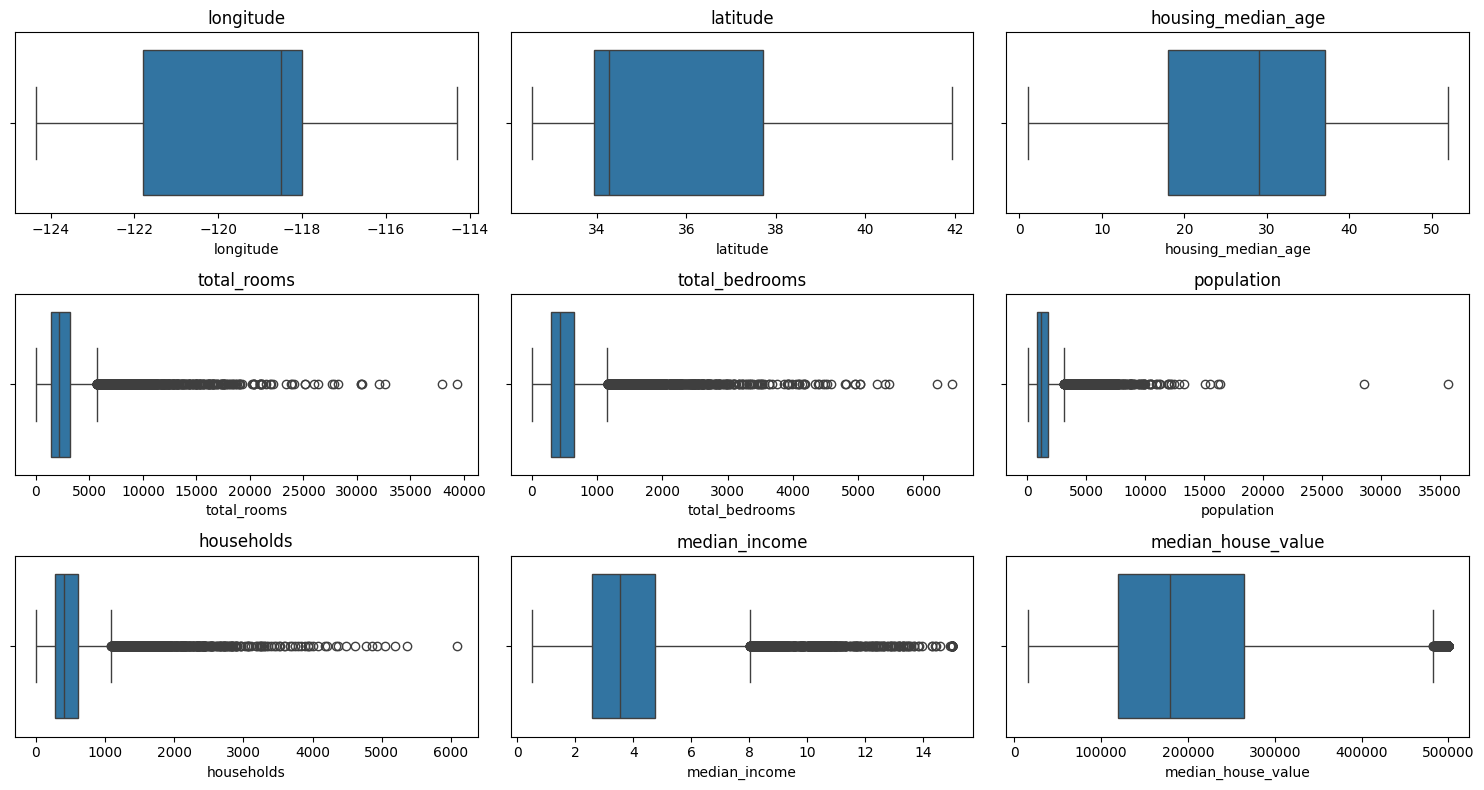

In [14]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(out_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

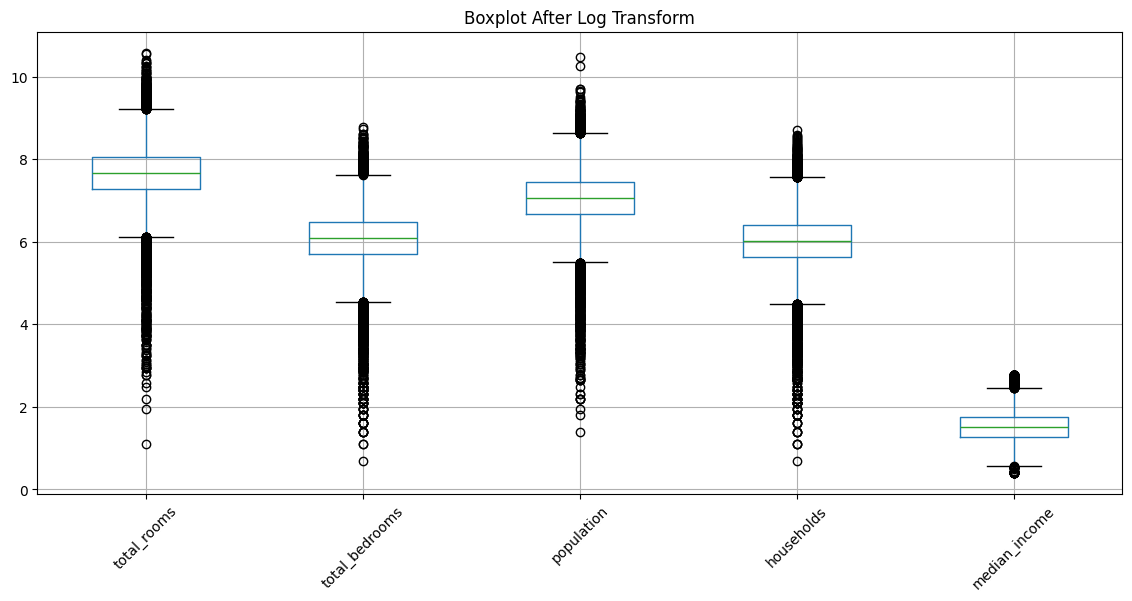

In [15]:
#handle outlier

log_cols = [
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]

for col in log_cols:
    df[col] = np.log1p(df[col])


df[log_cols].boxplot(figsize=(14, 6))
plt.xticks(rotation=45)
plt.title("Boxplot After Log Transform")
plt.show()

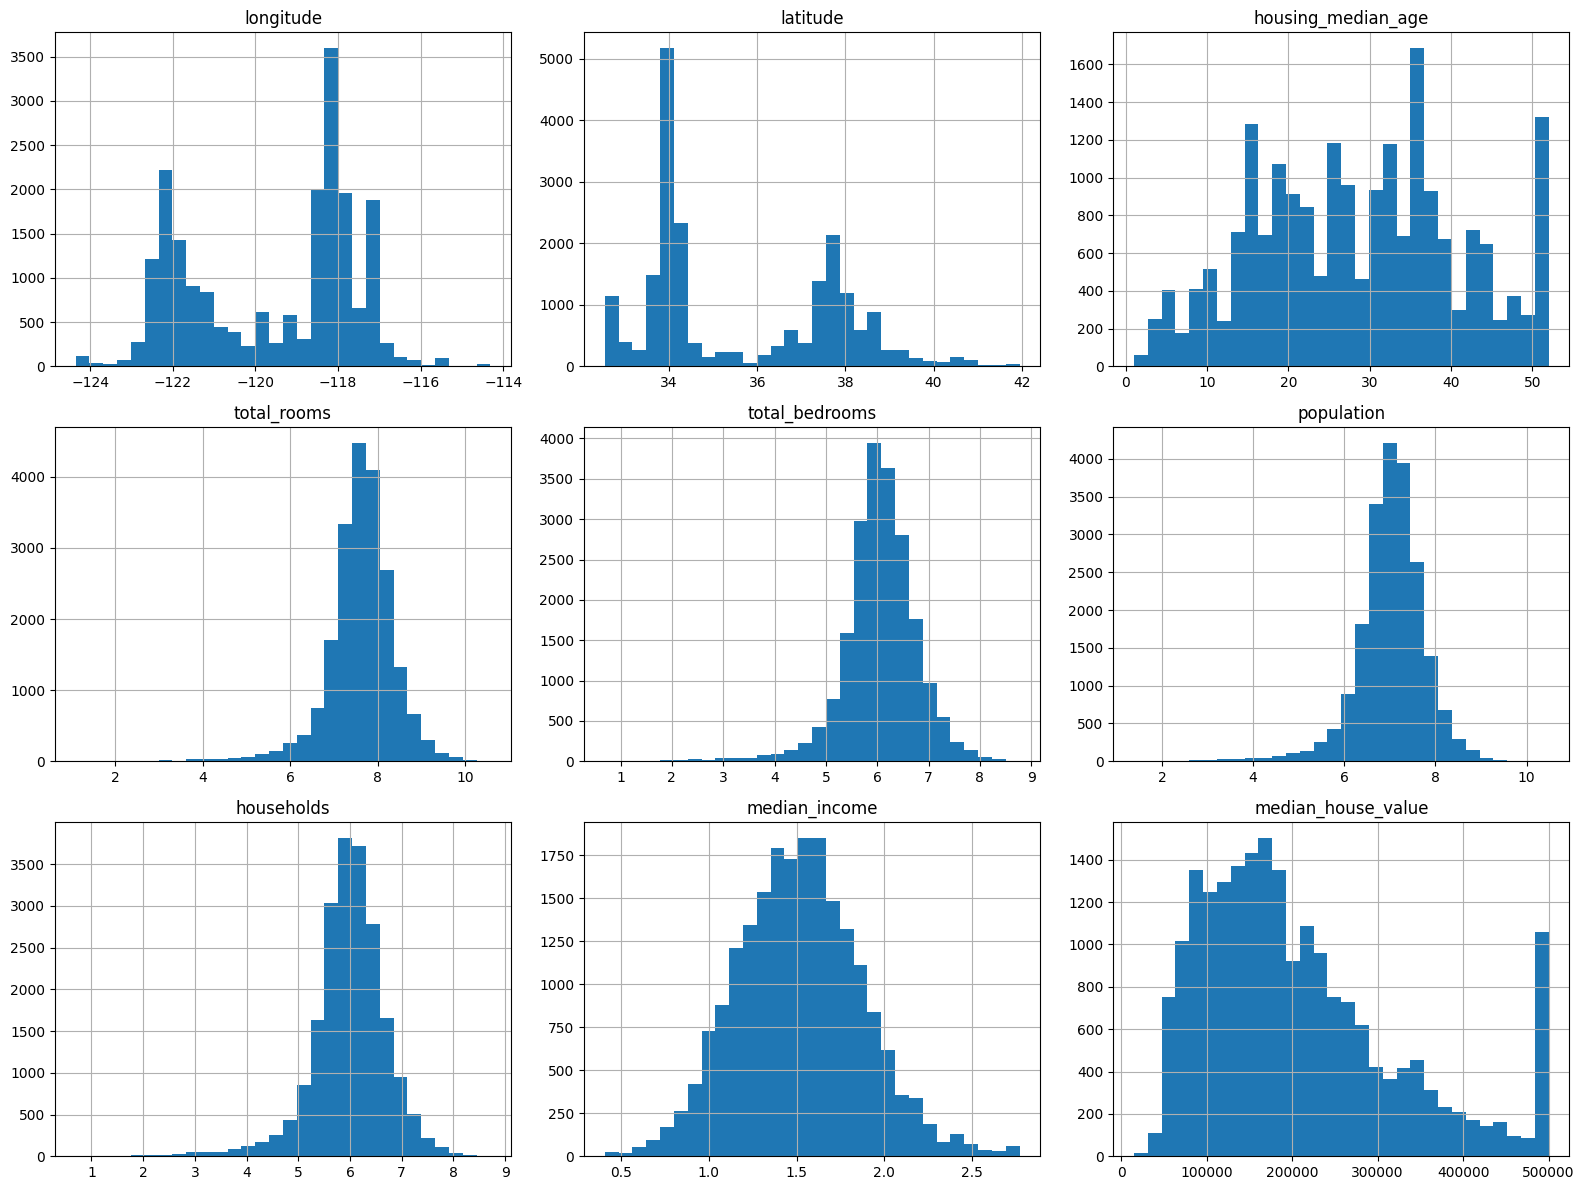

In [16]:
#EDA
num_cols = df.select_dtypes(include='number').columns

df[num_cols].hist(figsize=(16, 12), bins=30)
plt.tight_layout()
plt.show()

In [17]:
df['median_house_value'] = np.log1p(df['median_house_value'])

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [28]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

In [30]:
scaler= StandardScaler()

X_train= fit_transform(X_train, y_train)
X_test= transform(X_test)

NameError: name 'fit_transform' is not defined